## 143 - HURDAT2 Plotting

[Youtube](https://www.youtube.com/watch?v=BRJb5rSjjDc)

In [1]:
# Get file at: https://www.nhc.noaa.gov/data/hurdat/hurdat2-1851-2021-041922.txt  
# (https://www.nhc.noaa.gov/data/)

import pandas as pd
from datetime import datetime

In [2]:
def lat_lon_to_float(v):
    """
    Convert strings from NHC to float locations.
    """
    if (v[-1] == 'S') or (v[-1] == 'W'):
        multiplier = -1
    else:
        multiplier = 1
    return float(v[:-1]) * multiplier

In [3]:
data = []

In [4]:
with open('hurdat2-1851-2021-041922.txt', 'r') as f:
    for line in f.readlines():
        if line.startswith('AL'):
            storm_id = line.split(',')
            storm_number = storm_id[0].strip()
            storm_name = storm_id[1].strip()

        else:
            location_line = line.split(',')
            dt = datetime.strptime(location_line[0] + location_line[1], '%Y%m%d %H%M')
            storm_status = location_line[3].strip()
            storm_lat = lat_lon_to_float(location_line[4].strip())
            storm_lon = lat_lon_to_float(location_line[5].strip())
            max_speed = float(location_line[6].strip())
            data.append([storm_number, storm_name, storm_status, storm_lat, storm_lon, dt, max_speed])

In [5]:
data[-1]

['AL212021',
 'WANDA',
 'LO',
 43.2,
 -29.7,
 datetime.datetime(2021, 11, 8, 0, 0),
 40.0]

In [6]:
df = pd.DataFrame(data, columns = ['Storm Number', 'Storm Name', 'Storm Status', 'Lat', 'Lon', 'Time', 'Max Speed'])

In [7]:
df.head()

,Storm Number,Storm Name,Storm Status,Lat,Lon,Time,Max Speed
0,AL011851,UNNAMED,HU,28.0,-94.8,1851-06-25 00:00:00,80.0
1,AL011851,UNNAMED,HU,28.0,-95.4,1851-06-25 06:00:00,80.0
2,AL011851,UNNAMED,HU,28.0,-96.0,1851-06-25 12:00:00,80.0
3,AL011851,UNNAMED,HU,28.1,-96.5,1851-06-25 18:00:00,80.0
4,AL011851,UNNAMED,HU,28.2,-96.8,1851-06-25 21:00:00,80.0


In [8]:
df.tail()

,Storm Number,Storm Name,Storm Status,Lat,Lon,Time,Max Speed
53496,AL212021,WANDA,TS,37.4,-37.4,2021-11-07 00:00:00,35.0
53497,AL212021,WANDA,TS,38.1,-36.4,2021-11-07 06:00:00,35.0
53498,AL212021,WANDA,LO,39.2,-34.9,2021-11-07 12:00:00,35.0
53499,AL212021,WANDA,LO,40.9,-32.8,2021-11-07 18:00:00,40.0
53500,AL212021,WANDA,LO,43.2,-29.7,2021-11-08 00:00:00,40.0


In [9]:
len(df['Storm Number'].unique())

1936

In [10]:
df.groupby('Storm Status').count()

,Storm Number,Storm Name,Lat,Lon,Time,Max Speed
Storm Status,,,,,,
DB,230,230,230,230,230,230
EX,5929,5929,5929,5929,5929,5929
HU,15272,15272,15272,15272,15272,15272
LO,1483,1483,1483,1483,1483,1483
SD,317,317,317,317,317,317
SS,692,692,692,692,692,692
TD,9753,9753,9753,9753,9753,9753
TS,19687,19687,19687,19687,19687,19687
WV,138,138,138,138,138,138


In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

%matplotlib inline

In [12]:
plot_crs = ccrs.LambertConformal(central_longitude = -100., central_latitude = 45)
data_crs = ccrs.PlateCarree()

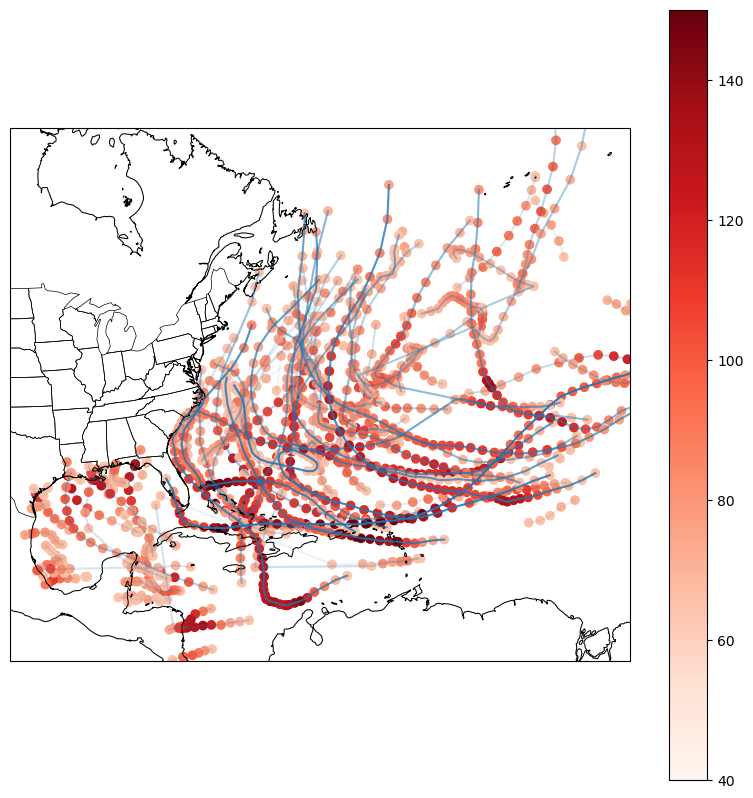

In [13]:
fig = plt.figure(figsize = (10, 10))
ax = plt.subplot(1, 1, 1, projection = plot_crs)

ax.set_extent([-100, -37, 12, 52], data_crs)
ax.coastlines('50m', edgecolor = 'k', linewidth = 0.75)
ax.add_feature(cfeature.STATES, linewidth = 0.5)

df_hu = df[df['Storm Status'] == 'HU']
df_hu = df_hu[df_hu['Time'] > datetime(2020-10, 1, 1)]

for storm_number in df_hu['Storm Number'].unique():
	storm_data = df_hu[df_hu['Storm Number'] == storm_number]
	track_len = len(storm_data)
	ax.plot(storm_data['Lon'], storm_data['Lat'], transform = data_crs, color = 'tab:blue', alpha = track_len / 55)
	s = ax.scatter(storm_data['Lon'], storm_data['Lat'], transform = data_crs, c = storm_data['Max Speed'], vmin = 40, vmax = 150, cmap = 'Reds')

plt.colorbar(s)

In [14]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [15]:
output_notebook()

Loading BokehJS ...

In [16]:
p = figure(title = 'Last Decade Hurricanes')

for storm_number in df_hu['Storm Number'].unique():
	storm_data = df_hu[df_hu['Storm Number'] == storm_number]
	p.line(storm_data['Lon'], storm_data['Lat'])
	
show(p)